In [1]:
import tensorflow as tf

In [7]:
X = tf.Variable([[0.4, 0.2, 0.4]])
W = tf.Variable([[-.5, -0.2], 
                [-0.3, 0.4], 
                [-0.5, 0.2], 
                ])
b = tf.Variable([[0.1, 0.2]])
XWb = tf.matmul(X, W) + b
y = tf.nn.relu(tf.matmul(X, W) + b)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print('XWb:'); print(sess.run(XWb))
    print('y:');print(sess.run(y))

XWb:
[[-0.35999998  0.28      ]]
y:
[[ 0.    0.28]]


In [11]:
y = tf.nn.sigmoid(tf.matmul(X, W)+b)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print('XWb:')
    print(sess.run(XWb))
    print('y:')
    print(sess.run(y))

XWb:
[[-0.35999998  0.28      ]]
y:
[[ 0.41095957  0.56954622]]


In [12]:
ts_norm =tf.random_normal([1000])
with tf.Session() as session:
    norm_data = ts_norm.eval()
print(norm_data[:5])

[ 1.02779353  0.28822654 -0.99443895  1.47790182  0.09687766]


In [13]:
import matplotlib.pyplot as plt


In [14]:
plt.hist(norm_data)

(array([   1.,    2.,   32.,  108.,  231.,  289.,  219.,   88.,   27.,    3.]),
 array([-4.0107007 , -3.27768188, -2.54466305, -1.81164422, -1.07862539,
        -0.34560657,  0.38741226,  1.12043109,  1.85344992,  2.58646874,
         3.31948757]),
 <a list of 10 Patch objects>)

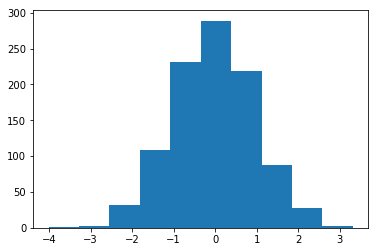

In [16]:
plt.show()

In [18]:
import numpy as np
w = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([1, 2]))
X = tf.placeholder('float', [None, 3])
y = tf.nn.relu(tf.matmul(X, w) + b)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.array([[0.4, 0.2, 0.4]])
    (_b, _w, _X, _y) = sess.run((b, w, X, y), feed_dict={X:X_array})
    print('b:'); print(_b)
    print('w:');print(_w)
    print('x:');print(_X)
    print('y:');print(_y)

b:
[[-1.19100189 -1.68131018]]
w:
[[ 0.56026673  0.36609742]
 [ 1.13791203 -2.67293358]
 [ 0.03942168  0.03784135]]
x:
[[ 0.40000001  0.2         0.40000001]]
y:
[[ 0.  0.]]


In [32]:
def layer(output_dim, input_dim, inputs, activation=None):
    w = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    Xwb = tf.matmul(inputs, w) + b
    if activation is None:
        outputs = Xwb
    else:
        outputs = activation(Xwb)
    return outputs

In [33]:
X = tf.placeholder('float', [None, 4])

In [34]:
h = layer(output_dim=3, 
          input_dim=4, 
          inputs=X, 
          activation=tf.nn.relu)


In [35]:
y = layer(output_dim=2, 
          input_dim=3,
          inputs=h)

In [36]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.array([[0.4, 0.2, 0.4, 0.5]])
    (layer_X, layer_h, layer_y) = \
        sess.run((X, h, y), feed_dict={X:X_array})
    print('input Layer X: '); print(layer_X)
    print('hidden Layer X:'); print(layer_h)
    print('output Layer y:'); print(layer_y)
    

input Layer X: 
[[ 0.40000001  0.2         0.40000001  0.5       ]]
hidden Layer X:
[[ 0.23460419  0.          0.        ]]
output Layer y:
[[ 0.98186421  0.01039228]]


In [54]:
def layer_debug(output_dim, input_dim, inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    Xwb = tf.matmul (inputs, W) + b
    if activation is None:
        outputs = Xwb 
    else:
        outputs = activation(XWb)
    return outputs, W, b

In [55]:
X = tf.placeholder('float', [None, 4])
h, w1, b1 = layer_debug(output_dim=3, input_dim=4, inputs=X, \
                        activation=tf.nn.relu)
y, w2, b2 = layer_debug(output_dim=2, input_dim=3, inputs=h)

ValueError: Dimension 1 in both shapes must be equal, but are 4 and 3
	From merging shape 0 with other shapes. for 'add_23/x' (op: 'Pack') with input shapes: [?,4], [4,3].

In [ ]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.array([[0.4, 0.2, 0.4, 0.5]])
    (layer_X, layer_h, layer_y, w1, b1, w2, b2)  = \
        sess.run((X, h, y, w1, b1, w2, b2), feed_dict={X:X_array})
        
    print('input Layer X:'); print(layer_X)
    print('w1:'); print(w1)
    print('b1:'); print(b1)
    print('hidden Laydder h:') ; print(layer_h)
    print('w2:');print(w2)
    print('b2:');print(b2)
    print('output Layer y: '); print(layer_y)